In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                                           --- Start Third Movie ---
Movie analysed: Aladdin
Analysis to do: 
    1- Percentage of Male and Female Characters
    2- Percentage of Male (Protagonist and Antagonist) and Female (Protagonist and Antagonist)
    3- Agency for Male and Female (Who has the greatest Agency)
        - 2 bar plot: uno con le medie agency x maschio e femmina e uno con tutte le agency in ordine crescente colorate diversamente 
    4- Agency Protagonist and Agency Antagonist - bar plot
    5- Embodiment for Gender and Role (only for the characters with major variation)
    (scatter plot)

In [2]:
# CSV Loading ... 
al_df_chars = pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Aladdin/AladdinCharacters.csv")
al_df_frames =  pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Aladdin/AladdinFrames.csv")
sns.set(rc={'axes.facecolor':'#DCE6E6'})
p_color = '#1CCD2F'
a_color = '#B711FA'
ph_color = '#AAE2B0'
ah_color = '#E1A0FA'
oth_color = '#E5CA31'
m_color = '#1D81E4'
f_color = '#FF79FB'

In [3]:
# Creating function for percentage automatic calculation: 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)

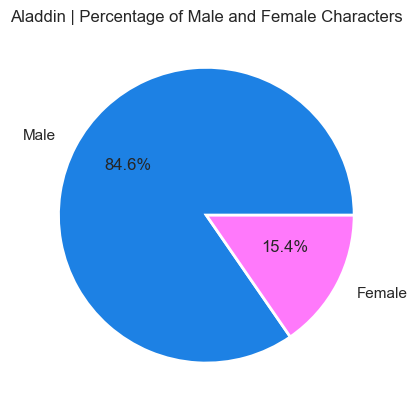

In [4]:
# 1- Percentage of Male and Female Characters
result = al_df_chars['GENDER'].value_counts()
data_gender = [result[0], result[1]]
gender_colors = [m_color, f_color]
gender_types = ['Male', 'Female']
plt.title("Aladdin | Percentage of Male and Female Characters")
plt.pie(data_gender, 
        labels = gender_types,
        colors = gender_colors,
        autopct = lambda pct: func(pct, data_gender), 
        labeldistance = 1.15, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
       );
plt.show()

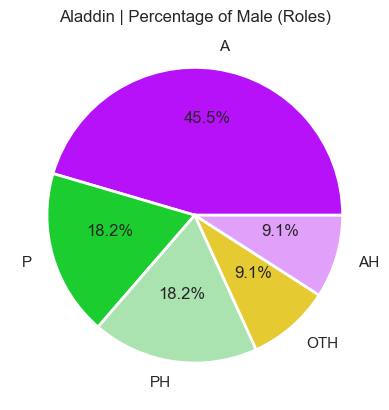

In [5]:
# 2.1 - Percentage of Male (Protagonist and Antagonist etc.)
all_chars = al_df_chars[['GENDER', 'ROLE']]
all_males = all_chars[all_chars['GENDER'] == 'M']

male_roles = all_males['ROLE']
male_roles_result = male_roles.value_counts()

data_male_roles = [male_roles_result[0], male_roles_result[1], male_roles_result[2], 
                   male_roles_result[3], male_roles_result[4]]
male_colors = [a_color, p_color, ph_color, oth_color, ah_color]
male_role_types = ['A', 'P', 'PH', 'OTH', 'AH']
plt.title("Aladdin | Percentage of Male (Roles)")
plt.pie(data_male_roles, 
        labels = male_role_types,
        colors = male_colors,
        autopct = lambda pct: func(pct, data_male_roles), 
        labeldistance = 1.15, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }
       );
plt.show()

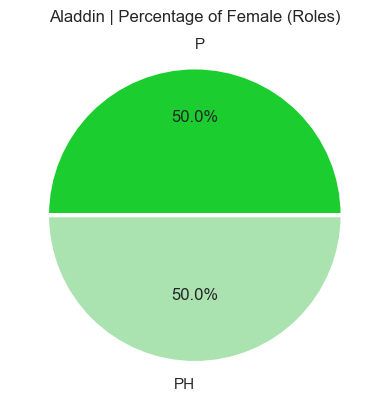

In [6]:
# 2.2 - Percentage of Female (Roles)
all_females = all_chars[all_chars['GENDER'] == 'F']

female_roles = all_females['ROLE']
female_roles_result = female_roles.value_counts()

data_female_roles = [female_roles_result[0], female_roles_result[1]]
female_colors = [p_color, ph_color]
female_role_types = ['P', 'PH']
plt.title("Aladdin | Percentage of Female (Roles)")
plt.pie(data_female_roles, 
        labels = female_role_types,
        colors = female_colors,
        autopct = lambda pct: func(pct, data_female_roles), 
        labeldistance = 1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
       );
plt.show()

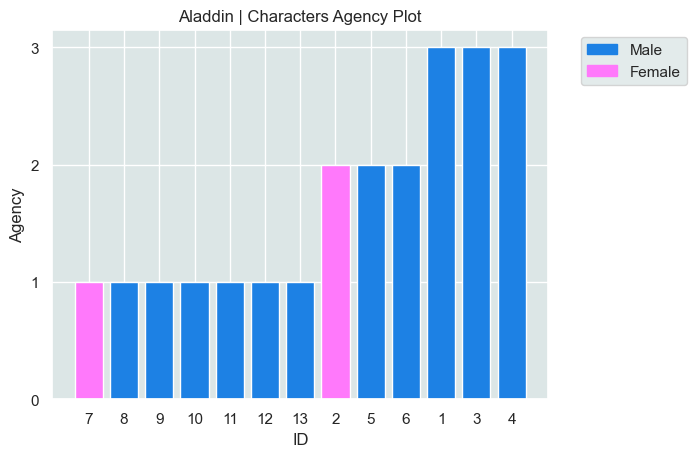

In [7]:
# 3- Bar plot with All agency in order with color division by gender. GENDER + AGENCY
all_agency = al_df_chars[['ID','GENDER', 'AGENCY']].sort_values('AGENCY')
# print(all_agency)
result_agency = []
result_gender = []
colors_results_gender = []
ids = []
# print(all_agency)
for id in all_agency['ID']:
    if id == -1:
        continue
    else:
        ids.append(id)
# print(ids)
for agency in all_agency['AGENCY']:
    if agency == '/':
        continue
    result_agency.append(int(agency))
# print(result_agency)
for gender in all_agency['GENDER']:
    if gender == '/':
        continue
    result_gender.append(gender)
# print(result_gender)

for g in result_gender:
    if g == 'F':
        colors_results_gender.append(f_color)
    else:
        colors_results_gender.append(m_color)

g_colors = {'Male': m_color, 'Female': f_color}         
g_labels = list(g_colors.keys())
g_handles = [plt.Rectangle((0,0),1,1, color = g_colors[label]) for label in g_labels]
plt.legend(g_handles, g_labels, bbox_to_anchor=(1.05, 1))


plt.xticks(range(len(result_agency)), ids)
plt.yticks([0,1,2,3])
plt.xlabel('ID')
plt.ylabel('Agency')
plt.title('Aladdin | Characters Agency Plot')
plt.bar(range(len(result_agency)), result_agency, color = colors_results_gender) 
plt.show()

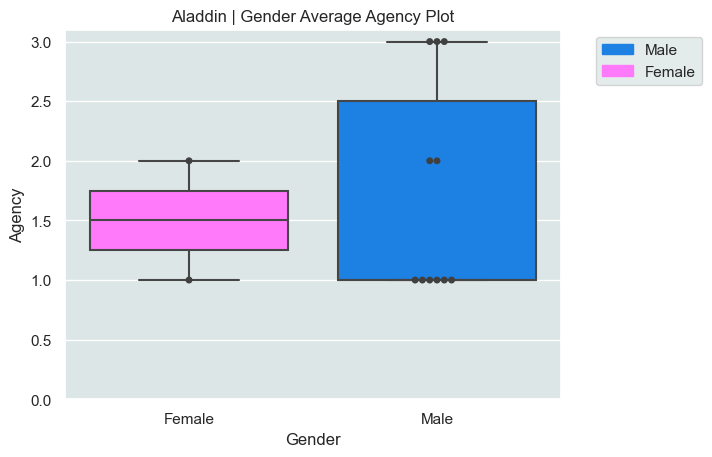

In [14]:
# 3.2 Average of Agency for male and Female

clean_agency = all_agency[1:]
mean_agency_gender = ['Female', 'Male']
mean_agency_gender_colors = [f_color , m_color]


g_ax = sns.boxplot(y="AGENCY",x="GENDER",data=clean_agency.astype({"AGENCY":"int32"}))
g_ax = sns.swarmplot(y="AGENCY",x="GENDER",data=clean_agency.astype({"AGENCY":"int32"}), color=".25")

for i,v in enumerate(mean_agency_gender_colors):
    mybox = g_ax.artists[i]
    mybox.set_facecolor(v)


plt.xticks(range(len(mean_agency_gender)), mean_agency_gender)
plt.ylim(0.0,3.10)
plt.xlabel('Gender')
plt.ylabel('Agency')

plt.legend(g_handles, g_labels, bbox_to_anchor=(1.3, 1))
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])

plt.title('Aladdin | Gender Average Agency Plot')
plt.show()

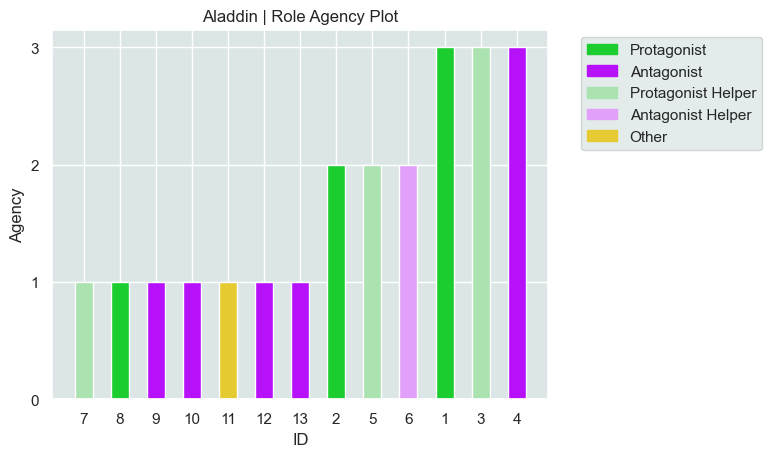

In [9]:
# 4.1 - Bar plot with All agency in order with color division by Role. ROLE + AGENCY  

all_agency_role = al_df_chars[['ID','ROLE', 'AGENCY']].sort_values('AGENCY') 
# print(all_agency)

p_a_ids = []
p_a_role = []
p_a_agency = []
p_a_colors = []
roles = ['P', 'A', 'PH', 'AH', 'OTH']
agency_role = all_agency_role[all_agency_role['ROLE'].isin(roles)]

for id in agency_role['ID']:
    p_a_ids.append(id)

for role in agency_role['ROLE']:
    p_a_role.append(role)

for ag in agency_role['AGENCY']:
    p_a_agency.append(int(ag))

for r in p_a_role:
    if r == 'A':
        p_a_colors.append(a_color)
    elif r == 'P':
        p_a_colors.append(p_color)
    elif r == 'PH':
        p_a_colors.append(ph_color)
    elif r == 'AH':
        p_a_colors.append(ah_color)
    else:
        p_a_colors.append(oth_color)
    
        
colors = {'Protagonist': p_color, 'Antagonist': a_color, 'Protagonist Helper': ph_color, 
          'Antagonist Helper': ah_color, 'Other': oth_color}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1))

plt.xticks(range(len(p_a_agency)), p_a_ids)
plt.xlabel('ID')
plt.yticks([0,1,2,3])
plt.ylabel('Agency')
plt.title('Aladdin | Role Agency Plot')
plt.bar(range(len(p_a_agency)), p_a_agency, color = p_a_colors, width = 0.5)
plt.show()

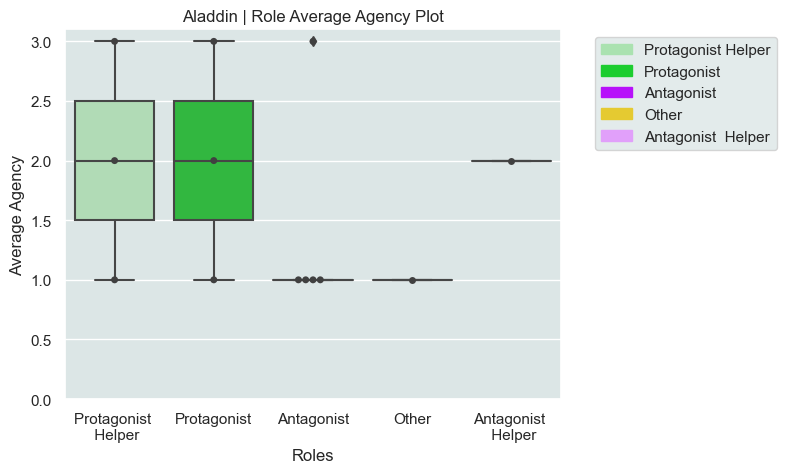

In [10]:
# 4.2 - Average of Agency for Antagonist and Protagonist

mean_agency_roles = ['Protagonist \n Helper', 'Protagonist', 'Antagonist', 'Other', 'Antagonist \n Helper']
mean_agency_role_colors = [ph_color , p_color, a_color, oth_color, ah_color]

sns.set_palette(sns.color_palette(mean_agency_role_colors))

r_ax = sns.boxplot(y='AGENCY', 
                   x='ROLE',
                   data=agency_role.astype({"AGENCY":"int32"})
                  )
r_ax = sns.swarmplot(y='AGENCY', 
                     x='ROLE',
                     data=agency_role.astype({"AGENCY":"int32"}), 
                     color=".25"
                    )
r_colors = {'Protagonist Helper': ph_color, 'Protagonist': p_color, 
            'Antagonist': a_color, 'Other': oth_color, 'Antagonist  Helper': ah_color}         
r_labels = list(r_colors.keys())
r_handles = [plt.Rectangle((0,0),1,1, color=r_colors[label]) for label in r_labels]


plt.xticks(range(len(mean_agency_roles)), mean_agency_roles)
plt.xlabel('Roles')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.ylim([0.0, 3.1])
plt.ylabel('Average Agency')
plt.title('Aladdin | Role Average Agency Plot')
plt.legend(r_handles, r_labels, bbox_to_anchor=(1.45, 1))

plt.show()


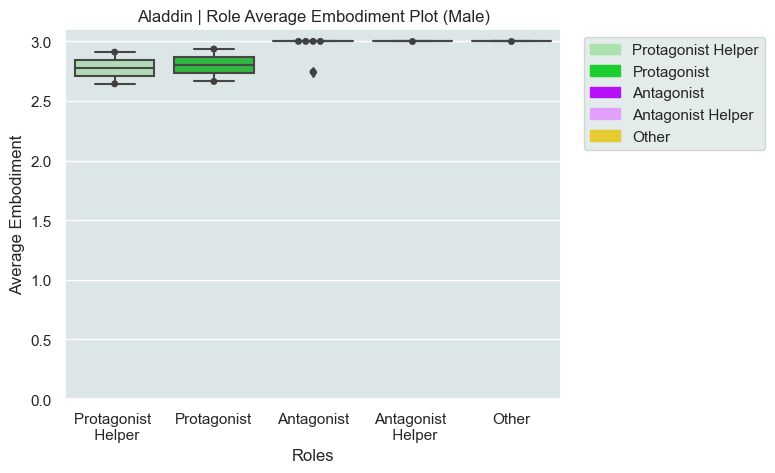

In [11]:
# 5 - Embodiment for Gender and Role --> MALE
# 5.1 - Average of embodiment for each Character 
#NOTA AGGIUNGERE BOX PLOT

# FRAMES WITHOUT -1 ID -- 
df_frames = al_df_frames[['FRAME', 'ID', 'EMBODIMENT']]
frames = df_frames[df_frames['ID'] != -1]

# MALE IDS LIST -- 
chars = al_df_chars[['ID', 'GENDER', 'ROLE']]
all_ids = chars[chars['ID'] != -1]
male_ids = all_ids[all_ids['GENDER'] == 'M']
male_chars = male_ids['ID'].tolist()
male_frames = frames[frames['ID'].isin(male_chars)].sort_values('ID')

m_counter_ids = []

m_avg_embodiment_results = []

for id_, e in zip(male_frames.ID, male_frames.EMBODIMENT):
    if id_ not in m_counter_ids:
        id_frames = male_frames[male_frames['ID'] == id_]
        avg_emb_id_ = id_frames['EMBODIMENT'].astype(int).mean()
        m_avg_embodiment_results.append(avg_emb_id_)
        m_counter_ids.append(id_)

zipped_lists = zip(m_avg_embodiment_results, m_counter_ids)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
m_avg_embodiment_results, m_counter_ids = [ list(tuple) for tuple in  tuples]

embodiment_male_colors = [ph_color, p_color, a_color, ph_color, p_color, ah_color, a_color, a_color,
                         oth_color, a_color, a_color]

m_data = [['ID', 'ROLE', 'EMBODIMENT']]
for id_, r, emb in zip(m_counter_ids, embodiment_male_colors, m_avg_embodiment_results):
    if r == p_color:
        role = 'P'
    elif r == ph_color:
        role = 'PH'
    elif r == a_color:
        role = 'A'
    elif r == ah_color:
        role = 'AH'
    else:
        role = 'OTH'
    
    m_data.append([id_, role, emb])
    

m_column_names = m_data.pop(0)

df_m_avg_embodiment = pd.DataFrame(m_data, columns=m_column_names)
m_mean_embodiment_roles = ['Protagonist \n Helper', 'Protagonist', 'Antagonist', 'Antagonist \n Helper', 'Other']
m_mean_embodiment_role_colors = [ph_color , p_color, a_color, ah_color, oth_color]
sns.set_palette(sns.color_palette(m_mean_embodiment_role_colors))

r_ax = sns.boxplot(y = 'EMBODIMENT', 
                   x = 'ROLE',
                   data = df_m_avg_embodiment.astype({"EMBODIMENT":"float64"})
                  )
r_ax = sns.swarmplot(y='EMBODIMENT', 
                     x='ROLE',
                     data=df_m_avg_embodiment.astype({"EMBODIMENT":"float64"}), 
                     color=".25"
                    )

emb_m_colors = {'Protagonist Helper': ph_color, 'Protagonist': p_color, 'Antagonist': a_color, 
               'Antagonist Helper': ah_color, 'Other': oth_color}         
emb_m_labels = list(emb_m_colors.keys())
emb_m_handles = [plt.Rectangle((0,0),1,1, color=emb_m_colors[label]) for label in emb_m_labels]
plt.legend(emb_m_handles, emb_m_labels, bbox_to_anchor=(1.03, 1))

plt.xticks(range(len(m_mean_embodiment_roles)), m_mean_embodiment_roles)
plt.xlabel('Roles')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.ylim([0.0, 3.1])
plt.ylabel('Average Embodiment')
plt.title('Aladdin | Role Average Embodiment Plot (Male)')

plt.show()

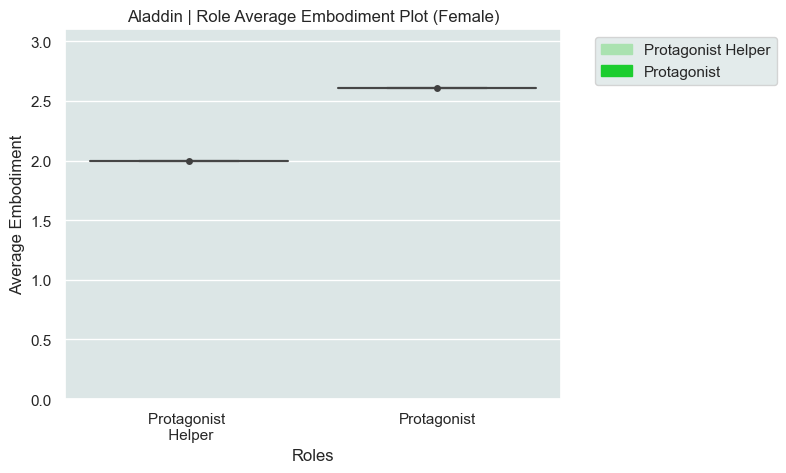

In [12]:
# 5 - Embodiment for Gender and Role --> FEMALE
# 5.2 - Average of embodiment for each Character 

# FEMALE IDS LIST -- 
female_ids = all_ids[all_ids['GENDER'] == 'F']

female_chars = female_ids['ID'].tolist()
female_frames = frames[frames['ID'].isin(female_chars)].sort_values('ID')

f_counter_ids = []


f_avg_embodiment_results = []

for id_, e in zip(female_frames.ID, female_frames.EMBODIMENT):
    if id_ not in f_counter_ids:
        id_frames = female_frames[female_frames['ID'] == id_]
        avg_emb_id_ = id_frames['EMBODIMENT'].astype(int).mean()
        f_avg_embodiment_results.append(round(avg_emb_id_, 2))
        f_counter_ids.append(id_)

f_zipped_lists = zip(f_avg_embodiment_results, f_counter_ids)
f_sorted_pairs = sorted(f_zipped_lists)
f_tuples = zip(*f_sorted_pairs)
f_avg_embodiment_results, f_counter_ids = [ list(tuple) for tuple in  f_tuples]

embodiment_female_colors = [ph_color, p_color]

f_data = [['ID', 'ROLE', 'EMBODIMENT']]
for id_, r, emb in zip(f_counter_ids, embodiment_female_colors, f_avg_embodiment_results):
    if r == p_color:
        role = 'P'
    elif r == ph_color:
        role = 'PH'
    elif r == a_color:
        role = 'A'
    elif r == ah_color:
        role = 'AH'
    else:
        role = 'OTH'
    
    f_data.append([id_, role, emb])
    

f_column_names = f_data.pop(0)

df_f_avg_embodiment = pd.DataFrame(f_data, columns = f_column_names)

f_mean_embodiment_roles = ['Protagonist \n Helper', 'Protagonist']
f_mean_embodiment_role_colors = [ph_color , p_color]
sns.set_palette(sns.color_palette(f_mean_embodiment_role_colors))

r_ax = sns.boxplot(y = 'EMBODIMENT', 
                   x = 'ROLE',
                   data = df_f_avg_embodiment.astype({"EMBODIMENT":"float64"})
                  )
r_ax = sns.swarmplot(y='EMBODIMENT', 
                     x='ROLE',
                     data=df_f_avg_embodiment.astype({"EMBODIMENT":"float64"}), 
                     color=".25"
                    )

emb_f_colors = {'Protagonist Helper': ph_color, 'Protagonist': p_color}         
emb_f_labels = list(emb_f_colors.keys())
emb_f_handles = [plt.Rectangle((0,0),1,1, color=emb_f_colors[label]) for label in emb_f_labels]
plt.legend(emb_f_handles, emb_f_labels, bbox_to_anchor=(1.45, 1))

plt.xticks(range(len(f_mean_embodiment_roles)), f_mean_embodiment_roles)
plt.xlabel('Roles')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.ylim([0.0, 3.1])
plt.ylabel('Average Embodiment')
plt.title('Aladdin | Role Average Embodiment Plot (Female)')

plt.show()

